# Fixkostenzuschuss 800.0000

Der Fixkostenzuschuss 800.0000 ist ein Hilfsprogramm der österreichischen Regierung zur Unterstützung von Unternehemen währrend der Corona-Krise. Alle Unternehmen, die einen Umsatzausfall von mindestens 30% zwischen dem 16. September 2020 und dem 30. Juni 2021 im Vergleich zur Vorjahr haben, bekommen den equivalenten prozentuellen Anteil an ihren Fixkosten ersetzt. Neben der Bedingung eines Umsatzverlustes von 30%, gibt es noch zwei weitere Bedingungen erstens der Auszahlungsbetrag muss mindestens 500€ betragen und Aes dürfen maximal zehn zeitlich zusammenhängende Betrachtungszeiträume bzw. zwei Blöcke von jeweils zeitlich zusammenhängenden Betrachtungszeiträumen ersetzt werden.

Dies bedeutet für ein Unternehmen, welche Betrachtungsräume soll ein Unternehmen wählen damit der Auszahlungsbetrag maximiert wird. Dabei zeigt sich bereits, dass es sich hierbei um ein Mathematisches Opitimierungsproblem handelt.

Welches man folgend aufschreiben kann

$$V = argmax_{S \in I}(1 - \frac{\sum_{i \in S}y_i}{\sum_{i \in S}x_i}) * \sum_{i \in S}z_i$$
$$x \in R^+ \cup \{0\}$$
$$y \in R^+ \cup \{0\}$$
$$z \in R^+ \cup \{0\}$$

Nebenbedinungen:
* $S$ kann nur aus darauffolgenden Elementen von $I$ bestehen bis auf einem Sprung.
* $$(1 - \frac{\sum_{i \in S}y_i}{\sum_{i \in S}x_i})>c$$

Dabei ist $V$ der Auszahlungsbetrag, $I$ ist Menge aller Perioden und $S$ der ausgewählte Betrachtungszeitrum (eine Teilmenge von $I$) und $c$ der minimale Umsatzausfall.

Das gegebene Optimierungsproblem lässt sich nicht vereinfachen oder effizienter berechnen, daher muss man alle Möglichkeiten berechnen um die optimale Lösung zu finden. Da der Zeitraum mit 10 Monaten begrenzt ist, gibt es nur eine begrenzte Anzahl an Möglichkeiten um genau zu sein 385 um den optimalen Zeitabschnitt zu wählen.

Speziell was sich bei der Optimierung zeigt, ist, dass die Wahl des optimalen Zeitabschnitts nicht immer sofort ersichtlich ist, sondern dass es oft vorteilhaft ist Perioden mit keinen Umsatzverlust hinzu zu nehmen, da der geringere prozentuelle Verlust und damit der prozentuelle Fixkostenzuschuss durch die höhere Summe der Fixkosten ausgeglichen werden. Was in den nachgestellten Beispielen dargestellt wird.

# Beispiel 1

In [87]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from fixkostenzuschuss.FKZ_800 import FKZ_800

In [88]:
# Data
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
rev_2019 = [
            30000,
            30000,
            40000,
            30000,
            40000,
            50000,
            30000,
            60000,
            90000,
            40000,
        ]
rev_2020 = [
            35000,
            50000,
            40000,
            20000,
            10000,
            20000,
            50000,
            40000,
            30000,
            60000,
        ]
fc = [
            20000,
            30000,
            20000,
            30000,
            20000,
            40000,
            50000,
            60000,
            50000,
            40000,
        ]


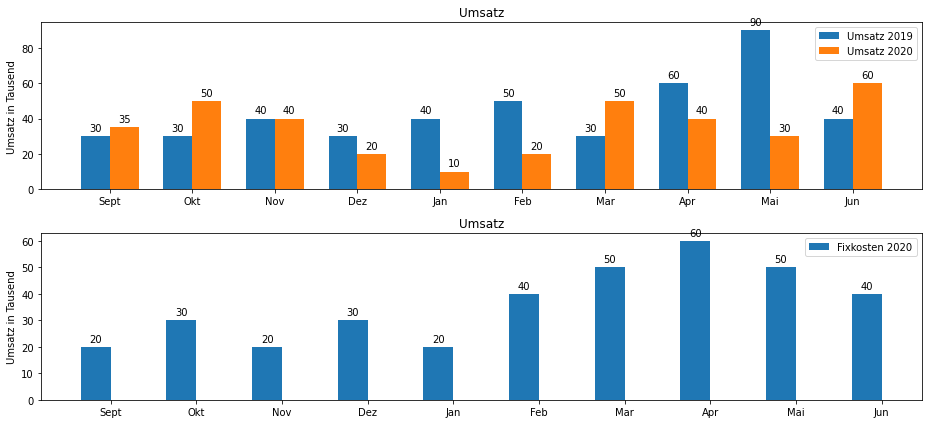

In [89]:

x = np.arange(len(rev_2020))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1)
ax_0 = ax[0]
rects1 = ax_0.bar(x - width/2, [x / 1000 for x in rev_2019], width, label='Umsatz 2019')
rects2 = ax_0.bar(x + width/2, [x / 1000 for x in rev_2020], width, label='Umsatz 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_0.set_ylabel('Umsatz in Tausend')
ax_0.set_title('Umsatz')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_0.set_xticks(x, labels)

ax_0.legend()

ax_0.bar_label(rects1, padding=3)
ax_0.bar_label(rects2, padding=3)

ax_1 = ax[1]
rects3 = ax_1.bar(x - width/2, [x / 1000 for x in fc], width, label='Fixkosten 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_1.set_ylabel('Umsatz in Tausend')
ax_1.set_title('Umsatz')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_1.set_xticks(x, labels)

ax_1.legend()

ax_1.bar_label(rects3, padding=3)
fig.tight_layout()

plt.show()

In [90]:
# Calculating FKZ
fkz = FKZ_800(rev_2019, rev_2020, fc)
print("Fixkostenzuschuss ist: {:,.2f}".format(fkz[0]))

Fixkostenzuschuss ist: 111,111.11


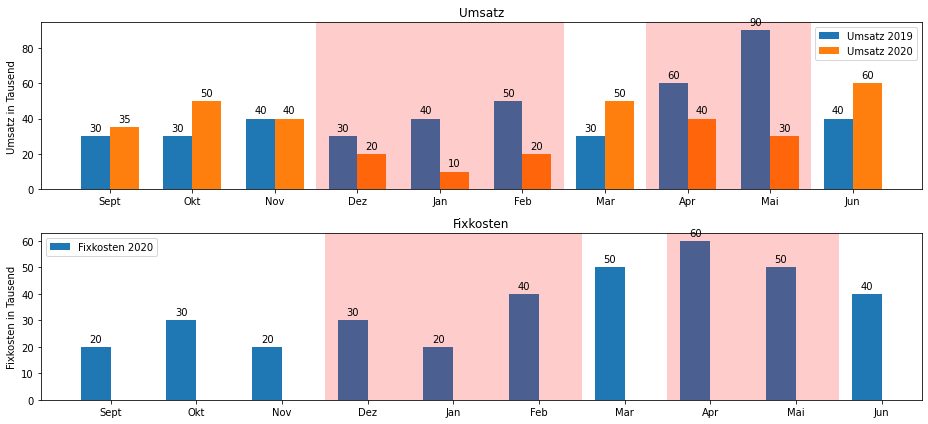

In [91]:
plt.rcParams["figure.figsize"] = (13,6)
x = np.arange(len(rev_2020))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1)
ax_0 = ax[0]
rects1 = ax_0.bar(x - width/2, [x / 1000 for x in rev_2019], width, label='Umsatz 2019')
rects2 = ax_0.bar(x + width/2, [x / 1000 for x in rev_2020], width, label='Umsatz 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_0.set_ylabel('Umsatz in Tausend')
ax_0.set_title('Umsatz')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_0.set_xticks(x, labels)

for index in fkz[1]:
    ax_0.axvspan(index-0.5, index+0.5, facecolor='red', edgecolor='none', alpha=.2)

ax_0.legend()

ax_0.bar_label(rects1, padding=3)
ax_0.bar_label(rects2, padding=3)



ax_1 = ax[1]
rects3 = ax_1.bar(x - width/2, [x / 1000 for x in fc], width, label='Fixkosten 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_1.set_ylabel('Fixkosten in Tausend')
ax_1.set_title('Fixkosten')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_1.set_xticks(x, labels)

for index in fkz[1]:
    ax_1.axvspan(index-0.5, index+0.5, facecolor='red', edgecolor='none', alpha=.2)

ax_1.legend()

ax_1.bar_label(rects3, padding=3)
fig.tight_layout()

plt.show()

# Beispiel 2

In [92]:
# Neue Fixkosten 
fc = [
            20000,
            30000,
            20000,
            30000,
            20000,
            40000,
            50000,
            60000,
            50000,
            70000,
        ]

In [93]:
# Calculating FKZ
fkz = FKZ_800(rev_2019, rev_2020, fc)
print("Fixkostenzuschuss ist: {:,.2f}".format(fkz[0]))

Fixkostenzuschuss ist: 113,225.81


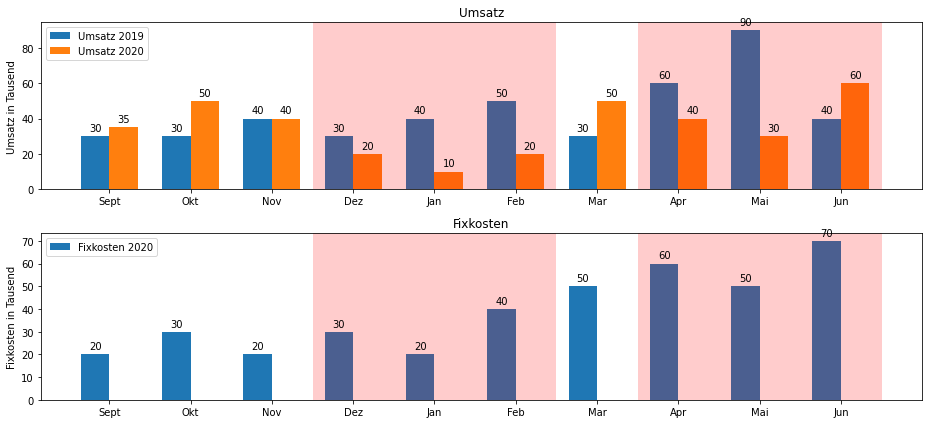

In [94]:
plt.rcParams["figure.figsize"] = (13,6)
x = np.arange(len(rev_2020))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1)
ax_0 = ax[0]
rects1 = ax_0.bar(x - width/2, [x / 1000 for x in rev_2019], width, label='Umsatz 2019')
rects2 = ax_0.bar(x + width/2, [x / 1000 for x in rev_2020], width, label='Umsatz 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_0.set_ylabel('Umsatz in Tausend')
ax_0.set_title('Umsatz')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_0.set_xticks(x, labels)

for index in fkz[1]:
    ax_0.axvspan(index-0.5, index+0.5, facecolor='red', edgecolor='none', alpha=.2)

ax_0.legend()

ax_0.bar_label(rects1, padding=3)
ax_0.bar_label(rects2, padding=3)



ax_1 = ax[1]
rects3 = ax_1.bar(x - width/2, [x / 1000 for x in fc], width, label='Fixkosten 2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_1.set_ylabel('Fixkosten in Tausend')
ax_1.set_title('Fixkosten')
labels = ["Sept", "Okt", "Nov", "Dez", "Jan", "Feb", "Mar", "Apr", "Mai", "Jun"]
ax_1.set_xticks(x, labels)

for index in fkz[1]:
    ax_1.axvspan(index-0.5, index+0.5, facecolor='red', edgecolor='none', alpha=.2)

ax_1.legend()

ax_1.bar_label(rects3, padding=3)
fig.tight_layout()

plt.show()

Dadurch, dass sich die Fixkosten im Juni von 40.000 auf 70.000 erhöht wurden wird Juni dem optimalen Zeitabschnitt hinzugefügt obwohl kein Umsatzverlust statt fand.